
# Project: Investigate a Dataset - [MOVIES.csv]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 


> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

> The dataset has columns that are, for the most part, dependent on each other. In film production, genre, popularity, budget allocation and revenue are important elements for the analysis. So this information will really be used in this analysis.

> Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.



### Question(s) for Analysis


#### 1. What is the most popular genres of all time?

#### 2. What genres seems to require less budget but make the most money?

#### 3. What year is more prolofic in movie production?

#### 4. Is there a correlation between the popularity and the revenue of a movie?



In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
% matplotlib inline
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
# Upgrade pandas to use dataframe.explode() function.
vers = pd.__version__
if vers =='1.0.4':
    print('Done.')
else:
    !pip install --upgrade pandas==1.0.4

Done.


<a id='wrangling'></a>
## Data Wrangling

> 


### General Properties
> 

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_movies = pd.read_csv('tmdb-movies.csv', sep=',')

In [4]:
# checking of the shape
df_movies.shape

(10866, 21)

In [5]:
# Let's overview the data structure
df_movies.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  \
0              The park is open.   
1             What a Lovely Day.   
2     One Choice Can Destroy You   
3  Every generation has a story.   
4            Vengeance Hits Home   

                                            keywords  \
0  monster|dna|tyrannosaurus rex|velociraptor|island   
1   future|chase|post-apocalyptic|dystopia|australia   
2  based on novel|revolution|dystopia|sequel|dyst...   
3              android|spaceship|jedi|space opera|3d   
4                car race|speed|revenge|suspense|car   

                                            overview  runtime  \
0  Twenty-two years after the events of Jurassic ...      124   
1  An apocalyptic story set in the furthest reach...      120   
2  Beatrice Prior must confront her inner demons ...      119   
3  Thirty years after defeating the Galactic Empi...      136   
4  Deckard Shaw seeks revenge against Dominic Tor...      137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15        6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15        2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15        5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15        2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09

In [6]:
# checking for missing values in the dataset
df_movies.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

We notice that there are many missing values, we'll do some action in the cleanning section

In [7]:
# Let's see a general summary of our data
df_movies.describe()

id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.812941  3.430616e+07  1.446325e+08  
min       10.000000      1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%       17.000000      5.400000   1995.000000  0.000000e+00  0.000000e+00  
50%       38.000000      6.000000   2006.000000  0.000000e+00  0.000000e+00  
75%      145.750000      6.600000   2011.000000  2.085325e+07  3.369710e+07  
max     9767.000000      9.200000   2015.000000  4.250000e+08  2.827124e+09

In [8]:
# type of all columns
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       


### Data Cleaning

 

The structure of data is inspected and issues about cleanning will be resolved below.


In [9]:
# Checking of missing values
df_movies.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [10]:
#This is the function to fill all object/string type empty values

def fill_empty(col):
    """
    @col: the column name that have null values
    @return: None, fills in place
    """
    df_movies[col].fillna('empty_filled', inplace=True)
    #print('Done.')

In [11]:
# cheking for duplicated values
sum(df_movies.duplicated())

1

In [12]:
# drop duplicates
df_movies.drop_duplicates(inplace=True)

In [13]:
sum(df_movies.duplicated())

0

In [14]:
type(df_movies['genres'][0])

str

Let's notice that most of the columns we need are of type OBJECTC or STRING. To answer our questions, we will treat them in such a way that we make the data uniform.

In [15]:
# Get the list of all column's name
columns_list = list(df_movies)

# in loop, replace all null values of an object/string column's type by 'empty_filled'
for c_name in columns_list:
    if df_movies[c_name].isna().sum() > 0 and isinstance(df_movies[c_name][0], str):
        fill_empty(c_name)

In [16]:
# checking if all is ok.
df_movies.isna().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [17]:
# let's put the column releas_date in a correct format
df_movies['release_date'] = pd.to_datetime(df_movies.release_date)

In [18]:
# let's view a sample of the dataframe
df_movies.sample(10)

id    imdb_id  popularity    budget    revenue  \
9530     9540  tt0094964    0.288071  13000000    8038508   
10463   11533  tt0057197    0.178713   1000000          0   
2470     2020  tt0120596    0.671070  51000000   36911617   
5232    11970  tt0119282    3.488910  85000000  252712101   
573    321594  tt4368814    0.082444         0          0   
10132   20975  tt0134614    0.158293         0          0   
3868    83660  tt2028530    0.077246         0          0   
3702    66125  tt0803061    0.302890         0          0   
3133    18176  tt1018818    0.345926  11500000      69564   
7769     7249  tt0471711    0.125117         0          0   

                                 original_title  \
9530                               Dead Ringers   
10463                   Jason and the Argonauts   
2470                               The Bachelor   
5232                                   Hercules   
573        Louis C.K.: Live at The Comedy Store   
10132                                  Devchata   
3868                 Paradise Lost 3: Purgatory   
3702                                    Red Dog   
3133   Assassination of a High School President   
7769               Futurama: Bender's Big Score   

                                                    cast  \
9530   Jeremy Irons|GeneviÃ¨ve Bujold|Heidi von Palle...   
10463  Todd Armstrong|Nancy Kovack|Gary Raymond|Laure...   
2470   Chris O'Donnell|RenÃ©e Zellweger|Artie Lange|H...   
5232   Tate Donovan|Josh Keaton|Roger Bart|Danny DeVi...   
573                                           Louis C.K.   
10132  Nadezhda Rumyantseva |Nikolai Rybnikov|Svetlan...   
3868   Jason Baldwin|Damien Wayne Echols|Jessie Miske...   
3702   Josh Lucas|Rachael Taylor|Rohan Nichol|Luke Fo...   
3133   Mischa Barton|Reece Thompson|Bruce Willis|Mich...   
7769        John DiMaggio|Al Gore|Billy West|Katey Sagal   

                                                homepage  \
9530                                        empty_filled   
10463                                       empty_filled   
2470                                        empty_filled   
5232                                        empty_filled   
573    https://www.louisck.net/purchase/live-at-the-c...   
10132                                       empty_filled   
3868                   http://paradiselost3themovie.com/   
3702                         http://www.reddogmovie.com/   
3133                                        empty_filled   
7769                                        empty_filled   

                           director  \
9530               David Cronenberg   
10463                   Don Chaffey   
2470                    Gary Sinyor   
5232       John Musker|Ron Clements   
573                      Louis C.K.   
10132                Yuri Chulyukin   
3868   Joe Berlinger|Bruce Sinofsky   
3702                  Kriv Stenders   
3133                    Brett Simon   
7769              Dwayne Carey-Hill   

                                                 tagline  \
9530                    Two bodies. Two minds. One soul.   
10463  Greatest Odyssey Of The Ages - for the first t...   
2470   One thousand brides. One hundred million dolla...   
5232                                       Zero to Hero!   
573                                         empty_filled   
10132                                       empty_filled   
3868   The complete inside story of the West Memphis ...   
3702                          He's Been Everywhere Mate.   
3133   Politics, popularity, paranoia, pharmaceutical...   
7769   Just when you thought it was safe to watch som...   

                                               keywords  \
9530         nurse|sex|based on novel|bondage|obsession   
10463               hero|menace|bravery|adventure|vlies   
2470         san francisco|bachelor|inheritance|wedding   
5232              hades|musical|peasant|olymp|animation   
573                            stand-up|stand up comedy   
10132     

Create a function to lowercase all values in some columns that we'll work with, for uniformity

In [19]:
## Function to strip whitepaces and lower letters
def lower_col_val(col, data=df_movies):
    """
    @param col: a column name
    @param data: a pandas dataframe
    @return: None, cleans in place
    """
    data[col] = data[col].apply(lambda x: x.strip().lower())
    
    df_movies[col].head()

In [20]:
# Get the list of all column's name
columns_list = list(df_movies)

In [21]:
# in loop, strip whitespaces and lower letters of any object/string column's type value

for c_name in columns_list:
    if isinstance(df_movies[c_name][0], str):
        lower_col_val(c_name)

In [22]:
# list of the most revelant columns to work with
imp_col = ['cast','director','genres','production_companies']

Assuming that most of cleaning are done, let's jump to the next step.

<a id='eda'></a>
## Exploratory Data Analysis

> 



> 


### Research Question 1 (What is the most popular genres of all time?)

We'll now begin to work with the 'genres' column.

In [23]:
# Replace spaces by underscore in a loop
# Bear in mind that our relevant columns are in imp_col variable

for c in imp_col:
    if c == 'genres':
        df_movies[c].replace([' ', '-'], '_', inplace=True, regex=True)
    else:
        df_movies[c].replace(' ', '_', inplace=True, regex=True)

In [24]:
# After replacing whitespaces and hyphens with underscores in genres column
# Now, we will convert each row to a list of strings.
# Since each string is divided by a '|', we use that for the separation

df_movies['genres'] = df_movies['genres'].apply(lambda x: x.split('|'))

In [25]:
# Visualize some
df_movies['genres'].head()

0    [action, adventure, science_fiction, thriller]
1    [action, adventure, science_fiction, thriller]
2            [adventure, science_fiction, thriller]
3     [action, adventure, science_fiction, fantasy]
4                         [action, crime, thriller]
Name: genres, dtype: object

Now that we have lists, we will explode into one series object and get the unique genres

In [26]:
# Using of the explode function
exploded_genres = df_movies.explode('genres').reset_index(drop=True)

In [27]:
# Lets see sthe hape
exploded_genres.shape

(26978, 21)

In [28]:
# Let's have a look
exploded_genres.head(3)

id    imdb_id  popularity     budget     revenue  original_title  \
0  135397  tt0369610   32.985763  150000000  1513528810  jurassic world   
1  135397  tt0369610   32.985763  150000000  1513528810  jurassic world   
2  135397  tt0369610   32.985763  150000000  1513528810  jurassic world   

                                                cast  \
0  chris_pratt|bryce_dallas_howard|irrfan_khan|vi...   
1  chris_pratt|bryce_dallas_howard|irrfan_khan|vi...   
2  chris_pratt|bryce_dallas_howard|irrfan_khan|vi...   

                        homepage         director            tagline  \
0  http://www.jurassicworld.com/  colin_trevorrow  the park is open.   
1  http://www.jurassicworld.com/  colin_trevorrow  the park is open.   
2  http://www.jurassicworld.com/  colin_trevorrow  the park is open.   

                                            keywords  \
0  monster|dna|tyrannosaurus rex|velociraptor|island   
1  monster|dna|tyrannosaurus rex|velociraptor|island   
2  monster|dna|tyrannosaurus rex|velociraptor|island   

                                            overview  runtime  \
0  twenty-two years after the events of jurassic ...      124   
1  twenty-two years after the events of jurassic ...      124   
2  twenty-two years after the events of jurassic ...      124   

            genres                               production_companies  \
0           action  universal_studios|amblin_entertainment|legenda...   
1        adventure  universal_studios|amblin_entertainment|legenda...   
2  science_fiction  universal_studios|amblin_entertainment|legenda...   

  release_date  vote_count  vote_average  release_year    budget_adj  \
0   2015-06-09        5562           6.5          2015  1.379999e+08   
1   2015-06-09        5562           6.5          2015  1.379999e+08   
2   2015-06-09        5562           6.5          2015  1.379999e+08   

    revenue_adj  
0  1.392446e+09  
1  1.392446e+09  
2  1.392446e+09

Now we can select the unique genres in descending order and plot it to to show for example the most popular genres of all time


In [29]:
all_genres = dict(exploded_genres.groupby('genres').count()['id'])

#delete the unknown genre
del all_genres['empty_filled']

all_genres

{'action': 2384,
 'adventure': 1471,
 'animation': 699,
 'comedy': 3793,
 'crime': 1354,
 'documentary': 520,
 'drama': 4760,
 'family': 1231,
 'fantasy': 916,
 'foreign': 188,
 'history': 334,
 'horror': 1637,
 'music': 408,
 'mystery': 810,
 'romance': 1712,
 'science_fiction': 1229,
 'thriller': 2907,
 'tv_movie': 167,
 'war': 270,
 'western': 165}

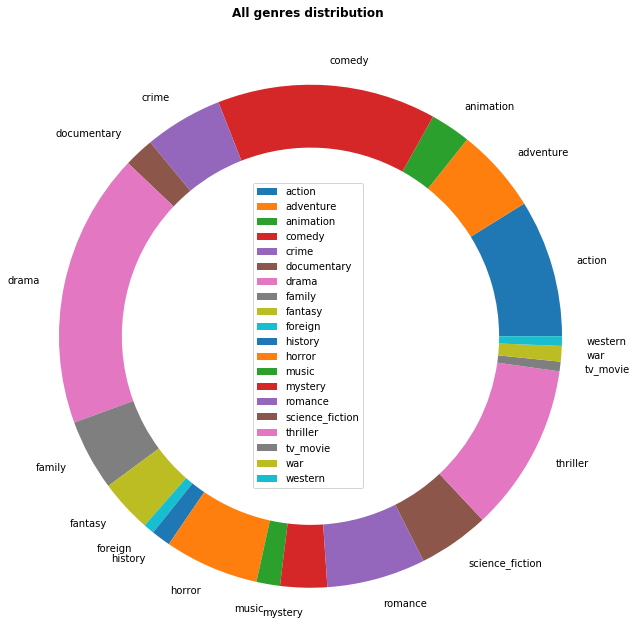

In [45]:
# Plotting

colors = sns.color_palette('bright')

plt.figure(figsize=(10,10))
plt.pie(list(all_genres.values()), labels=list(all_genres.keys()),
        wedgeprops={'width':0.25})
plt.title('All genres distribution',y=1.075, fontweight='bold')
plt.axis('equal')
plt.legend(loc='center')
plt.show()

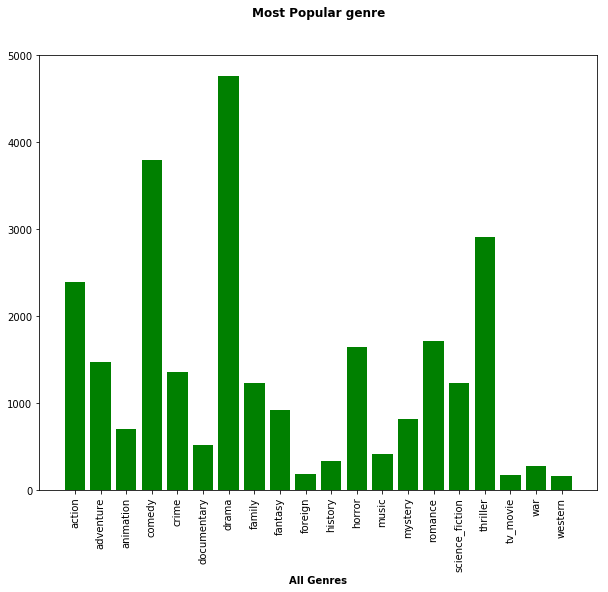

In [31]:
# plotting bars
plt.figure(figsize=(10,8))
x= all_genres.keys()
y= all_genres.values()
           
plt.bar(x, y, color='green')
plt.xticks(rotation=90)
           
plt.title('Most Popular genre',y=1.075, fontweight='bold')
plt.xlabel('All Genres', fontweight='bold')

plt.show()


The most popular genres of all time is DRAMA, with about 4760 movies.

### Research Question 2 (What genres seems to require LESS budget but make the most money?)

After cleaning the genre, let's work on it to try to answer the first question.
1. We need to find the high revenue percentile
2. Instead of the mean, we'll use the median of Budget as there's movie with 0 budget
3. Then we'll extract a set of budgets that is inferior of the amount of median
4. And then check if in the lower budget set there is movies that can be part of the high revenue percentile set
5. list those movies, group them by genres and plot them


In [32]:
exploded_genres.shape

(26978, 21)

In [33]:
# review the desc
df_movies.describe()

id    popularity        budget       revenue       runtime  \
count   10865.000000  10865.000000  1.086500e+04  1.086500e+04  10865.000000   
mean    66066.374413      0.646446  1.462429e+07  3.982690e+07    102.071790   
std     92134.091971      1.000231  3.091428e+07  1.170083e+08     31.382701   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.000000      0.207575  0.000000e+00  0.000000e+00     90.000000   
50%     20662.000000      0.383831  0.000000e+00  0.000000e+00     99.000000   
75%     75612.000000      0.713857  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10865.000000  10865.000000  10865.000000  1.086500e+04  1.086500e+04  
mean     217.399632      5.975012   2001.321859  1.754989e+07  5.136900e+07  
std      575.644627      0.935138     12.813260  3.430753e+07  1.446383e+08  
min       10.000000      1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%       17.000000      5.400000   1995.000000  0.000000e+00  0.000000e+00  
50%       38.000000      6.000000   2006.000000  0.000000e+00  0.000000e+00  
75%      146.000000      6.600000   2011.000000  2.085325e+07  3.370173e+07  
max     9767.000000      9.200000   2015.000000  4.250000e+08  2.827124e+09

We can see that the high revenue is from 75 percentile to the max

In [34]:
# let put the revenue desc in a variable
rev_dec = df_movies.revenue.describe()

In [35]:
# find the 75 percentle
rev_75p = rev_dec['75%']
rev_75p

24000000.0

In [36]:
# all high & low revenue set
high_rev = df_movies[df_movies.revenue >= rev_75p]

high_rev.shape

(2718, 21)

Let's work on the budget column

In [37]:
# extraticng the description of the column to have the high budget
budg_dec = df_movies.budget.describe()
budg_75p = budg_dec['75%']
budg_75p

15000000.0

In [38]:
# let's use the average budget to consider as the limit
low_budg = df_movies[df_movies.budget < budg_75p]

low_budg.shape

(7977, 21)

In [39]:
# let's get all indexes we'll need
low_budg_index = list(low_budg.index)
high_rev_index = list(high_rev.index)


In [40]:
# Low budget with high revenue dataframe indexes
low_bu_high_rev_index = list(set(low_budg_index) & set(high_rev_index))

len(low_bu_high_rev_index)

704

In [41]:
#high_bu_low_rev_movies = df_movies.loc[high_bu_low_rev_index, :]
#high_bu_low_rev_movies.shape
low_bu_high_rev_movies = df_movies.loc[low_bu_high_rev_index, :]
low_bu_high_rev_movies.shape

(704, 21)

In [42]:
# sample view
low_bu_high_rev_movies.sample(3)

id    imdb_id  popularity   budget   revenue         original_title  \
7838  11449  tt0078767    0.593218        0  86432000  the amityville horror   
3450  75900  tt1655420    1.116674  6400000  35057696   my week with marilyn   
6115   8879  tt0089767    0.619817        0  41410568             pale rider   

                                                   cast  \
7838  james_brolin|margot_kidder|rod_steiger|don_str...   
3450  michelle_williams|eddie_redmayne|kenneth_brana...   
6115  clint_eastwood|michael_moriarty|carrie_snodgre...   

                                homepage          director  \
7838                        empty_filled  stuart_rosenberg   
3450  http://myweekwithmarilynmovie.com/      simon_curtis   
6115                        empty_filled    clint_eastwood   

                                  tagline  \
7838             for god's sake, get out!   
3450  sometimes you just need to get away   
6115      ... and hell followed with him.   

                                               keywords  \
7838  haunted house|long island|indian burial ground...   
3450  based on novel|biography|historical figure|mar...   
6115         gunslinger|showdown|marshal|blackmail|mine   

                                               overview  runtime  \
7838  george lutz and his wife kathleen, move into t...      117   
3450  sir laurence olivier is making a movie in lond...       99   
6115  a small gold mining camp is terrorised by a ru...      115   

                         genres  \
7838  [drama, horror, thriller]   
3450                    [drama]   
6115         [romance, western]   

                                   production_companies release_date  \
7838              american_international_pictures_(aip)   1979-07-27   
3450  bbc_films|the_weinstein_company|uk_film_counci...   2011-10-17   
6115                       warner_bros.|malpaso_company   1985-06-28   

      vote_count  vote_average  release_year    budget_adj   revenue_adj  
7838          81           6.2          1979  0.000000e+00  2.596896e+08  
3450         212           6.7          2011  6.204147e+06  3.398486e+07  
6115         120           6.8          1985  0.000000e+00  8.394610e+07

Text(0,0.5,'Number')

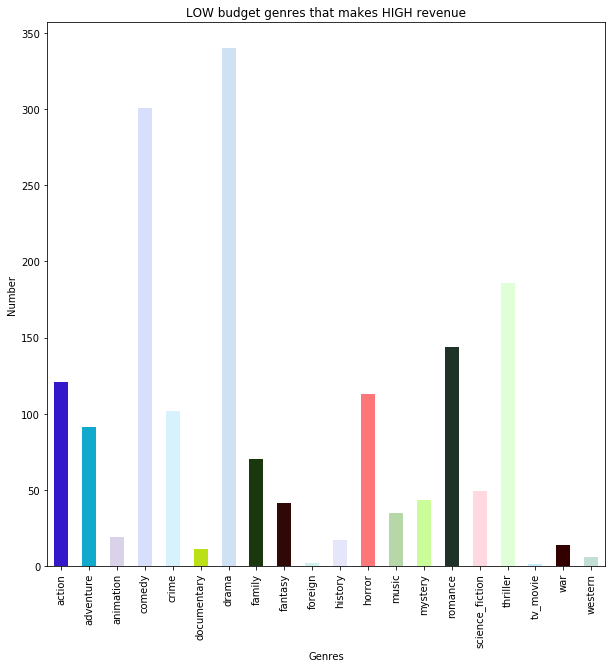

In [43]:
# explode our dataset
lbu_hrev_exploded = low_bu_high_rev_movies.explode('genres').reset_index(drop=True)

# Group result by genre and count them
q2_genres = lbu_hrev_exploded.groupby('genres').count()['id']

c = ['#3319c9','#11aacc','#d9d2e9','#d7dffd','#d7f2fd','#bbe116',
     '#cfe2f3','#1b370d','#2e0906','#d3f0eb','#e6e6fa','#ff7678',
     '#b6d7a8','#cafd99','#1e3228','#ffd9df','#dfffd9','#c7eaff',
     '#330000','#c3ded3','#ccd4d3','#002924']

q2_genres.plot(kind='bar', color = c);

q2_genres.plot(kind='bar', figsize=(10,10), title='LOW budget genres that makes HIGH revenue', color=c);
plt.xlabel('Genres', fontsize=10)
plt.ylabel('Number', fontsize=10)

We can see on the plot that, DRAMA and COMEDY are two kind of genre with more chance to make more money than expected

### Research Question 3  (What year is more prolofic in movie production?)

To answer this question, we have to list movies with high revenues and compare variables, unique, repetitive, popularity
mixte of genres, same director, same production_companies, cast's name, etc


In [49]:
# Let's see them
unique_genres = list(all_genres.keys())
unique_genres

['action',
 'adventure',
 'animation',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'foreign',
 'history',
 'horror',
 'music',
 'mystery',
 'romance',
 'science_fiction',
 'thriller',
 'tv_movie',
 'war',
 'western']

In [50]:
# Number of unique genres
len(unique_genres)

20

In [51]:
# we can add each unique genre as a column to a new dataset
df_genres_exploded = df_movies.copy()
df_genres_exploded[unique_genres] = pd.DataFrame(columns=unique_genres, index=df_movies.index).fillna(0)

In [52]:
# 
df_genres_exploded[unique_genres] = pd.DataFrame(columns=unique_genres, index=df_movies.index).fillna(0)

In [53]:
# let's see
df_genres_exploded.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                jurassic world   
1            mad max: fury road   
2                     insurgent   
3  star wars: the force awakens   
4                     furious 7   

                                                cast  \
0  chris_pratt|bryce_dallas_howard|irrfan_khan|vi...   
1  tom_hardy|charlize_theron|hugh_keays-byrne|nic...   
2  shailene_woodley|theo_james|kate_winslet|ansel...   
3  harrison_ford|mark_hamill|carrie_fisher|adam_d...   
4  vin_diesel|paul_walker|jason_statham|michelle_...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   colin_trevorrow   
1                        http://www.madmaxmovie.com/     george_miller   
2     http://www.thedivergentseries.movie/#insurgent  robert_schwentke   
3  http://www.starwars.com/films/star-wars-episod...       j.j._abrams   
4                           http://www.furious7.com/         james_wan   

                         tagline  \
0              the park is open.   
1             what a lovely day.   
2     one choice can destroy you   
3  every generation has a story.   
4            vengeance hits home   

                                            keywords  \
0  monster|dna|tyrannosaurus rex|velociraptor|island   
1   future|chase|post-apocalyptic|dystopia|australia   
2  based on novel|revolution|dystopia|sequel|dyst...   
3              android|spaceship|jedi|space opera|3d   
4                car race|speed|revenge|suspense|car   

                                            overview  runtime  \
0  twenty-two years after the events of jurassic ...      124   
1  an apocalyptic story set in the furthest reach...      120   
2  beatrice prior must confront her inner demons ...      119   
3  thirty years after defeating the galactic empi...      136   
4  deckard shaw seeks revenge against dominic tor...      137   

                                           genres  \
0  [action, adventure, science_fiction, thriller]   
1  [action, adventure, science_fiction, thriller]   
2          [adventure, science_fiction, thriller]   
3   [action, adventure, science_fiction, fantasy]   
4                       [action, crime, thriller]   

                                production_companies release_date  vote_count  \
0  universal_studios|amblin_entertainment|legenda...   2015-06-09        5562   
1  village_roadshow_pictures|kennedy_miller_produ...   2015-05-13        6185   
2  summit_entertainment|mandeville_films|red_wago...   2015-03-18        2480   
3          lucasfilm|truenorth_productions|bad_robot   2015-12-15        5292   
4  universal_pictures|original_film|media_rights_...   2015-04-01        2947   

   vote_average  release_year    budget_adj   revenue_adj  action  adventure  \
0           6.5          2015  1.379999e+08  1.392446e+09       0          0   
1           7.1          2015  1.379999e+08  3.481613e+08       0          0   
2           6.3          2015  1.012000e+08  2.716190e+08       0          0   
3           7.5          2015  1.839999e+08  1.902723e+09       0          0   
4           7.3          2015  1.747999e+08  1.385749e+09       0          0   

   animation  comedy  crime  documentary  drama  family  fantasy  foreign  \
0          0       0      0            0      0       0        0        0   
1          0       0      0            0      0       0        0        0   
2          0       0      0            0      0       0        0        0   
3          0       0      0            0      0       0        0        0   
4          0       0      0            0  

In [54]:
# Create a function to update each row of the movies dataset at the corresponding column
def update_genres(row):
    """This method updates each row of the movies dataset
    @param row: A Pandas Series of each row of the dataset row index is the column names of the movie dataset
    """

    # iterate through each list of genres and update the corresponding column
    for genre in row['genres']:
        row[genre] = 1
    return row

In [55]:
# Now apply the method to all rows of the dataset at once

df_genres_exploded = df_genres_exploded.apply(update_genres, axis=1)

In [56]:
# Let's see first 3 values

df_genres_exploded.head(3)

action  adventure  animation     budget    budget_adj  \
0       1          1          0  150000000  1.379999e+08   
1       1          1          0  150000000  1.379999e+08   
2       0          1          0  110000000  1.012000e+08   

                                                cast  comedy  crime  \
0  chris_pratt|bryce_dallas_howard|irrfan_khan|vi...       0      0   
1  tom_hardy|charlize_theron|hugh_keays-byrne|nic...       0      0   
2  shailene_woodley|theo_james|kate_winslet|ansel...       0      0   

           director  documentary  drama  empty_filled  family  fantasy  \
0   colin_trevorrow            0      0           NaN       0        0   
1     george_miller            0      0           NaN       0        0   
2  robert_schwentke            0      0           NaN       0        0   

   foreign                                          genres  history  \
0        0  [action, adventure, science_fiction, thriller]        0   
1        0  [action, adventure, science_fiction, thriller]        0   
2        0          [adventure, science_fiction, thriller]        0   

                                         homepage  horror      id    imdb_id  \
0                   http://www.jurassicworld.com/       0  135397  tt0369610   
1                     http://www.madmaxmovie.com/       0   76341  tt1392190   
2  http://www.thedivergentseries.movie/#insurgent       0  262500  tt2908446   

                                            keywords  music  mystery  \
0  monster|dna|tyrannosaurus rex|velociraptor|island      0        0   
1   future|chase|post-apocalyptic|dystopia|australia      0        0   
2  based on novel|revolution|dystopia|sequel|dyst...      0        0   

       original_title                                           overview  \
0      jurassic world  twenty-two years after the events of jurassic ...   
1  mad max: fury road  an apocalyptic story set in the furthest reach...   
2           insurgent  beatrice prior must confront her inner demons ...   

   popularity                               production_companies release_date  \
0   32.985763  universal_studios|amblin_entertainment|legenda...   2015-06-09   
1   28.419936  village_roadshow_pictures|kennedy_miller_produ...   2015-05-13   
2   13.112507  summit_entertainment|mandeville_films|red_wago...   2015-03-18   

   release_year     revenue   revenue_adj  romance  runtime  science_fiction  \
0          2015  1513528810  1.392446e+09        0      124                1   
1          2015   378436354  3.481613e+08        0      120                1   
2          2015   295238201  2.716190e+08        0      119                1   

                      tagline  thriller  tv_movie  vote_average  vote_count  \
0           the park is open.         1         0           6.5        5562   
1          what a lovely day.         1         0           7.1        6185   
2  one choice can destroy you         1         0           6.3        2480   

   war  western  
0    0        0  
1    0        0  
2    0        0

In [57]:
# Now, we can drop the original genres column

df_genres_exploded.drop(columns='genres', inplace=True)

Grouping by release_date to know the prolific year

In [58]:
# finding the prolific year
genres_over_year = df_genres_exploded.groupby('release_year').sum()
prolific_year = genres_over_year.loc[:,unique_genres].T

prolific_year

release_year     1960  1961  1962  1963  1964  1965  1966  1967  1968  1969  \
action              8     7     8     4     5     9    14     7     6    10   
adventure           5     6     7     7     5     6    11     7     5     5   
animation           0     1     0     1     2     1     3     2     3     3   
comedy              8    10     5    13    16     7    16    17     9    12   
crime               2     2     3     4    10     2     5     7     5     3   
documentary         0     0     0     0     0     0     1     1     0     0   
drama              13    16    21    13    20    20    16    16    20    13   
family              3     5     2     3     4     3     7     3     5     4   
fantasy             2     2     1     2     4     0     2     3     5     2   
foreign             1     1     1     2     1     1     2     0     0     0   
history             5     3     4     4     3     4     2     0     3     3   
horror              7     3     5     9     6     5     3     4     4     1   
music               1     2     1     0     5     2     0     5     3     2   
mystery             0     1     4     6     4     3     6     3     4     1   
romance             6     7     5     8     9     5     6    11     6     4   
science_fiction     3     4     2     2     4     2     6     4     4     3   
thriller            6     0     7    10     9    11     8     5     5     3   
tv_movie            0     0     0     0     0     1     0     0     0     1   
war                 2     2     3     1     3     8     4     1     4     3   
western             6     3     3     2     1     4     7     2     1     7   

release_year     1970  1971  1972  1973  1974  1975  1976  1977  1978  1979  \
action             11    11    10    15    14    10    13    14    15     8   
adventure           6     5     5     5     8     8     6    15    11     8   
animation           2     1     1     3     1     1     0     5     2     1   
comedy             12     9    13     8    12    12    12    11    14    19   
crime               4    10     7    17    15     6     8     2     6     8   
documentary         3     0     1     1     2     1     1     1     3     0   
drama              19    30    16    31    21    17    22    24    29    30   
family              3     2     2     4     4     2     3     8     6     5   
fantasy             3     2     1     1     3     4     2     9     5     0   
foreign             1     0     0     0     0     0     1     0     1     0   
history             3     3     0     2     1     3     2     4     2     3   
horror              5     7     8    15     8     8     9    14    19    11   
music               4     1     2     1     1     3     3     3     3     4   
mystery             3     6     4     7     5     8     7     5     7     4   
romance             6     9     5     3     4     2     5     4     5     8   
science_fiction     3     6     4     6     5    11     5    11    16    10   
thriller            5    17    10    16    20    13    17    12    22    16   
tv_movie            1     1     0     1     1     0     1     0     3     0   
war                 5     4     0     0     1     2     2     4     4     3   
western             8     5     5     4     2     3     3     1     1     4   

release_year     1980  1981  1982  1983  1984  1985  1986  1987  1988  1989  \
action             27    17    17    21    33    28    30    29    32    38   
adventure          14    14    10    14    22    28    17    17    15    24   
animation           0     3     6     3     1     2     7     4     7     5   
comedy             25    20    28    28    38    51    49    57    69    63   
crime               9    10     9    11    15    14    18    21    21    25   
documentary         0     2     1     0     2     1     0     0     5     2   
drama              32    32    33    35    40    40    51    52    54    54   
family              4     5     8     4     9   

In [59]:
prolific_year.sum().max()

1470

In [60]:
#visualizing years and number of movies
prolific_year.sum()

release_year
1960      78
1961      75
1962      82
1963      91
1964     111
1965      94
1966     119
1967      98
1968      92
1969      80
1970     107
1971     129
1972      94
1973     140
1974     128
1975     114
1976     122
1977     147
1978     174
1979     142
1980     207
1981     198
1982     212
1983     208
1984     287
1985     277
1986     316
1987     332
1988     372
1989     369
1990     366
1991     362
1992     364
1993     476
1994     508
1995     480
1996     525
1997     525
1998     573
1999     574
2000     584
2001     655
2002     734
2003     738
2004     791
2005     935
2006    1044
2007    1126
2008    1239
2009    1358
2010    1211
2011    1278
2012    1275
2013    1383
2014    1470
2015    1386
dtype: int64

#### The most prolific year is 2014 with a total of 1470 productions.

### Research Question 4  (Is there a correlation between the popularity and the revenue of a movie?)

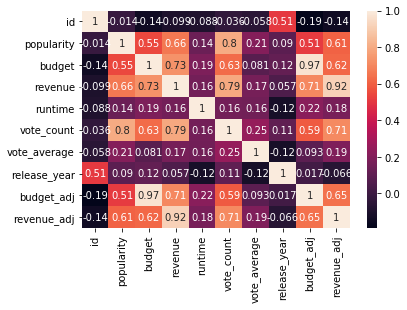

In [61]:
# Let's check the correlation between those two variables

# importing librairies
import seaborn as sns
import matplotlib as plt

# loading data and checking correlation using heatmap
corr_plot = sns.heatmap(df_movies.corr(), annot=True)


As shown in this matrix, the correlation between movie popularity and revenues is positive and it's 0.66. This could explain that as movie popularity increase increases, the revenue may increase too.

<a id='conclusions'></a>
## Conclusions

> At the end of our analysis we realize the importance of the cinematographic universe in the world and that for years the production of films has been one of the most fashionable areas.
Our analysis has allowed us to show, among other things, the type of film that has been coming back over the years as well as the budget-revenue ratio of each production and we found it very interesting to know that the drama genre followed by the comedy are very profitable and timeless. They are maintained despite the current trend of new films: science fiction, adventure, action, etc.
We must also point out the relationship between the fact that a popular film genre is generally (more than 60%) able to earn a lot of money although there may be flops.

> Many of the questions were left unanswered because we realized that we were limited in our ability to answer them due to a lack of knowledge of development and statistics.
We also had limitations in the graphical presentation of our results as the mastery of the use of tools (matplotlib, seaborn, etc.) is not yet effective.
For example, knowing who are the most active producers (with more successful films on their books) can help in the choice of the program of films to be shown in a cinema. Knowing which actors appear most often in successful films (or genres) could help an art center to orientate the video courses of the actors to follow, etc.

> But we are confident that we will be able to answer all relevant questions over time through training and practice as this is part of our participation goals.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [57]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0